
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 40</p>
## <p style="text-align: center;">Due: Wed, October 4th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

When K is big, the model is very simple. If K=n(n is the sample size), it takes the average. When the model is used to explain a complex problem with not a lot of flexibility, it introduces bias. At the same time, by being simple the estimates tend to have low variance.

When K is small, the model is very complex and is able to quickly adapt to the real situation and hence lead to small bias. However, by being to adaptable, it tends to vary a lot so the model has a high variance.

In general, the lower the bias is, the higher the variance is. It is important to find the sweet spot in the bias-variance trade-off.

# Question 2: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 3 scatterplots of "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## Answer

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
df = pd.read_csv('~/Downloads/russett_full_v2.csv')

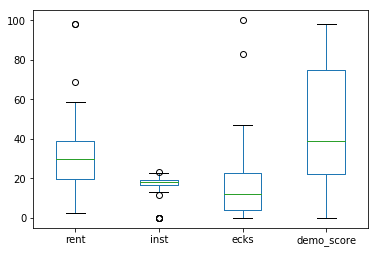

The cutoff values for outliers is <1.5IQR below 1stQ or >1.5IQR above 3rdQ.


In [2]:
#(a)
plt.show(df[['rent','inst','ecks','demo_score']].plot(kind = 'box'))
print 'The cutoff values for outliers is <1.5IQR below 1stQ or >1.5IQR above 3rdQ.'

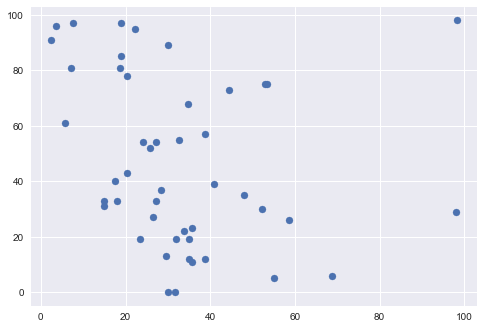

In [15]:
plt.scatter(df['rent'],df['demo_score'])

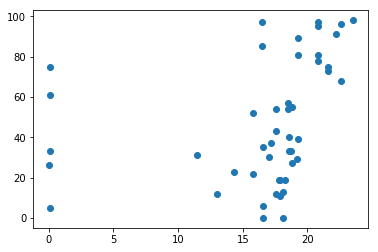

In [4]:
plt.scatter(df['inst'],df['demo_score'])

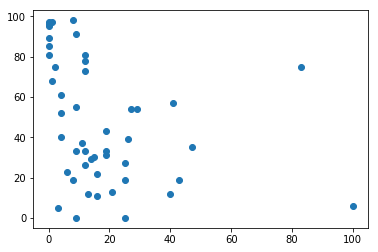

In [5]:
plt.scatter(df['ecks'],df['demo_score'])

In [6]:
#有问题 最后一个问题没看明白
#(b)
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X = df[['rent','inst','ecks']]
y = df['demo_score']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)

mlr = linear_model.LinearRegression()
mlr.fit(X_train,y_train)
y_train_predict = mlr.predict(X_train)
y_test_predict = mlr.predict(X_test)
print 'X_train_RMSE =', np.sqrt(mean_squared_error(y_train, y_train_predict))
print 'X_test_RMSE =', np.sqrt(mean_squared_error(y_test, y_test_predict))

X_train_RMSE = 25.781460397
X_test_RMSE = 32.580671803


In [7]:
#(c)
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(alpha = 0.0)
huber.fit(X_train, y_train)
y_train_predict = huber.predict(X_train)
y_test_predict = huber.predict(X_test)
print 'X_train_RMSE =', np.sqrt(mean_squared_error(y_train, y_train_predict))
print 'X_test_RMSE =', np.sqrt(mean_squared_error(y_test, y_test_predict))

X_train_RMSE = 26.8358817541
X_test_RMSE = 29.1663802872


In [8]:
#(d)
import seaborn as sns


# Question 3 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$ ± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

1.
(i)  n = 0.5*0.5*(1.65/0.03)^2 = 756.25 

(ii) n = 0.25*0.75*(1.65/0.03)^2 = 567.19
So, the minimun value of n needed is 757 when p = 0.5, 568 when p = 0.25.

2.
(i) When α changes from 0.02 to 0.01, Z a/2 changes from 2.33 to 2.58, so the number of sampling n will increase to (1000/2.33^2)x2.58^2 = 1227

(ii) The same as above, (1000x4/2.33^2)x1.96^2 = 2831

# Question 4 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [9]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [10]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

In [11]:
#(a)
#(i)
import numpy as np
from sklearn.decomposition import PCA
pca = decomposition.PCA(n_components = 65)
pca.fit(X)
plt.plot(pca.explained_variance_ratio_)

NameError: name 'decomposition' is not defined

In [ ]:
#(ii)
var = pca.explained_variance_ratio_
cumvar = np.cumsum(var*100)
plt.plot(cumvar)

In [ ]:
#(b)
def f(x):
    for i in range(0,65):
        if cumvar[i] > x:
            return i
print 'Number of principal components of cumulative variance of 30% N1 =', f(30)+1
print 'Number of principal components of cumulative variance of 60% N2 =', f(60)+1
print 'Number of principal components of cumulative variance of 90% N3 =', f(90)+1

In [ ]:
from sklearn.linear_model import LinearRegression
pca_N1 = decomposition.PCA(n_components = 1)
X_N1 = pca_N1.fit_transform(X)
pca_N1.fit(X_N1,y)
reg = linear_model.LinearRegression()
reg.fit(X_N1,y)
y_N1_predict = reg.predict(X_N1)
print 'MSE_N1 =', mean_squared_error(y,y_N1_predict)
#y_N1_predict = pca_N1.predict(X_N1)
#MSE_N1 = mean_squared_error(y, y_N1_predict)

In [ ]:
pca_N2 = decomposition.PCA(n_components = 3)
X_N2 = pca_N2.fit_transform(X)
pca_N1.fit(X_N2,y)
reg = linear_model.LinearRegression()
reg.fit(X_N2,y)
y_N2_predict = reg.predict(X_N2)
print 'MSE_N2 =', mean_squared_error(y,y_N2_predict)

In [ ]:
pca_N3 = decomposition.PCA(n_components = 7)
X_N3 = pca_N3.fit_transform(X)
pca_N1.fit(X_N3,y)
reg = linear_model.LinearRegression()
reg.fit(X_N3,y)
y_N3_predict = reg.predict(X_N3)
print 'MSE_N3 =', mean_squared_error(y,y_N3_predict)

# Question 5 -  Feature Selection ( 5 points )

Explain what you understand by the two wrapper methods for feature selection (forward and backward selection) (no more than 1 paragraph). 


First of all, these two wrapper methods belong to Feature selection method, which means select a subset of original feature. Second, forward and backward selection methods conduct a search of the predictors to determine which, when entered into the model, produce the best results. We usually use RMSE as the evaluation. For forward selection model, the process is add predictors to the model that results in the smallest model RMSE. From this process, the RMSE is monitored to determine a point where the error began to increase. The subset size associated with the smallest RMSE would be chosen.
